In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import sin, pi

# Домашнее задание 1
**Вариант 14**

Задачи 

|I.8.18*| 1*.6| 3*|
|---|---|---|
|done|||

## I.8.18
Рассмотрим модель представления чисел в IEEE-арифметике следующего вида

$S = \{\pm b_0, b_1b_2b_3 \cdot 2^{\pm a}\}$, где числа $a, b_1, b_2, b_3 \in \{0, 1\}$, а число $b_0 = 1$ всегда, кроме того случая, когда $a=b_1=b_2=b_3=0$, в этом случае $b_0 \in\{0, 1\}$


a) Построить множество $S$ на действительной оси. Сколько чисел в данной модели арифметики у Вас получилось?

б) Чему равны машинные константы $\varepsilon_{маш}, UFL, OFL$ в этой модели?

в) Постройте график функции sin(𝑥) в заданной арифметике с плавающей запятой.

## Решение


### Пункт a


Пусть n - число принадлежащее S
1) $a=b_1=b_2=b_3=0$
    1) $n = 0.000$
    2) $n = \pm 1.000$

    Итого 3 числа
1) Иначе
    * Тогда $n$ представим в виде $n = \pm 1,b_1b_2b_3\cdot 2^{\pm a}$
    * $b_1, b_2, b_3 \in \{0, 1\} => $ всего вариантов $2^3 = 8$
    * $a \in \{-1, 0, 1\} =>$ всего вариантов 3
        
        $2 \cdot 3 \cdot 8 = 48$
    * но случаи $\pm 1.000$ уже были учтены $=> 48 - 2 = 46$
    
    Итого 46 чисел
    
Всего чисел в данной модели арифметики $46 + 3 = 49$

#### Построим множество S на действительной оси

Всего чисел в модели: 49


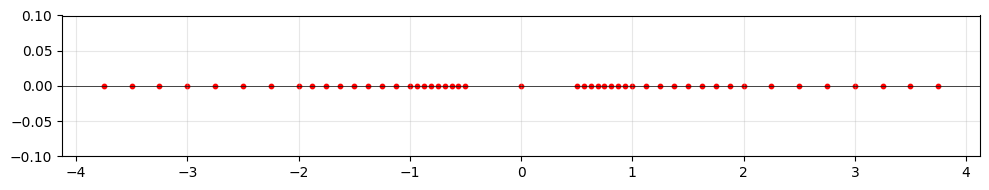

In [2]:
def generate_numbers():
    numbers = []
    
    # a = b_1 = b_2 = b_3 = 0
    numbers.append(0.0)
    numbers.append(1.0)
    numbers.append(-1.0)


    b0 = 1
    for a in [0, 1]:
        for b1 in [0, 1]:
            for b2 in [0, 1]:
                for b3 in [0, 1]:
                    if a == b1 and a == b2 and a == b3 and a == 0:
                        continue

                    # mantisa = b0 + b1 * 2^-1 + b2 * 2^-2 + b3 * 2^-3
                    mantissa = b0 + b1 * 0.5 + b2 * 0.25 + b3 * 0.125
                    
                    for sign in [1, -1]:
                        a_sign = a * sign
                        num = mantissa * (2 ** a_sign)
                        numbers.extend([num, -num])
    
    numbers = sorted(list(set(numbers)))
    return numbers

number = generate_numbers()
print(f"Всего чисел в модели: {len(number)}")


# нарисуем
plt.figure(figsize=(10, 2))
plt.scatter(number, [0]*len(number), s=10, c='red')
plt.axhline(y=0, color='black', linewidth=0.5)
plt.grid(True, alpha=0.3)
plt.ylim(-0.1, 0.1)
plt.tight_layout()

plt.show()


### Пункт б


#### OFL
_**Def.** Порог переполнения, который есть максимальное представимое число, так что любое большее число полагается равным бесконечности._

In [3]:
# выведем максимальное число из посчитанных в пункте a
print(max(number))


3.75


OFL соответсвует числу, полученному с помощью максимальных
$b_0,b_1,b_2, b_3, a$, т.е.

$OFL = (1 + 0,5 + 0,25 + 0,125) \cdot 2^1 = 3,75$

#### UFL
_**Def.** порог машинного нуля, - нормализованное число, что любое число полагается равным нулю (положительное)_

In [4]:
min_ = 100
for num in number:
    if num <= 0:
        continue
    if num < min_:
        min_ = num
print(min_)

0.5


$UFL = 1.000_2 \cdot 2^{-1}$, т.е.

$UFL = (1 + 0\cdot 0.5 + 0\cdot 0.25 + 0\cdot 0.125)\cdot 2^{-1} = 0.5$

#### $\varepsilon_{маш}$
_**Def.** максимальное число, которое в машинной арифметиге обеспечивает справедливость равентства_ $1+ \varepsilon_{маш} = 1$

В нашем случае основание $ n = (-1)^s (1 + f \cdot 2^{-3}) e^{\pm 1}$, тогда

$\varepsilon_{маш} := \frac{1}{2}\cdot 2^{-3} = 0.5 \cdot 0,125 = 0,0625$

### Пункт в

Для построения функции $sin(x)$ в заданной арифметике с плавающей запятой нужно:

$f : S \to S$
1) посчитать значение $f = sin(x) \ \forall x \in S$
2) найти ближайшее к каждому $f$ из множества $S$

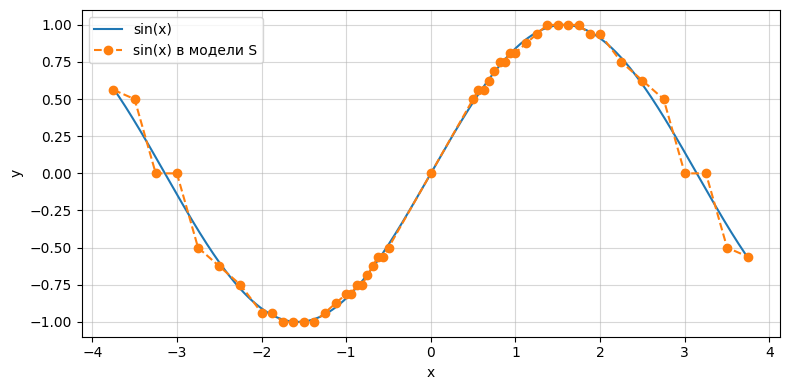

In [5]:
def func_to_s(x, S):
    distances = [abs(x - num) for num in S]
    idx = int(np.argmin(distances))
    return S[idx]

def sin_x_in_s(x, S):
    y = np.sin(x)
    return func_to_s(y, S)

x_points = [x for x in number]
y_points = [sin_x_in_s(x, number) for x in x_points]

X = np.linspace(min(number), max(number), 2000)
Y = np.sin(X)
plt.figure(figsize=(8,4))
plt.plot(X, Y, label='sin(x)')
plt.plot(x_points, y_points, 'o--', label='sin(x) в модели S')
plt.legend()
plt.xlabel('x'); plt.ylabel('y'); plt.grid(True, alpha=0.5)
plt.tight_layout()

## 1.6
$f'(x) = a*f(x+2*h) + b*f(x-h) + c*f(x - 2*h) + d*f(x - 3 * h)$

$g(x) = \cos(2x), \ f(x) = \cos^2(x), \ x_0 = \frac{\pi}{8}$

1) На заданом шаблоне получить формулу численого дифференцирования, которая
точна для функции $g(x)$ и имеет максимально возможный порядок аппроксимации.
Указать полученный порядок аппроксимации.
1) Вывести выражение для оценки ошибки численного дифференцировании с учетом
погрешности округлений. Получить аналитическое выражение для оптимального
шага численного дифференцирования и соответствующей ему ошибки дифференцирования.
1) Программно реализовать полученную формулу численного дифференцирования
для вычисления соответствующей производной функции $f(x)$ в точке $x_0$.
1) Постройте на одном графике экспериментальную и теоретическую зависимости
ошибки от шага численного дифференцирования при использовании арифметики
с плавающей точкой одинарной и двойной точности. Сделать вывод о соответсвтии
теоретической оценки результатам численных расчетов экспериментов.

#### Получение формулы для $f'(x)$

Для этого воспользуюсь МНК:
1. разложение функций в ряды Тейлога с остаточным членом в форме Лагранжа
2. составление системы уравнений, что $"коэффициент \ при \ f'(x)"=1$, а остальные $=0$
3. из этой системы получаем значения $a, b, c, d$
4. определение порядка точности из вида остаточного члена

In [7]:
from sympy import symbols, series, Function, pprint, latex, sin, cos
from IPython.display import display, Markdown, Math
x, h, a, b, c, d = symbols('x h a b c d')
f = Function('f')

# Разложение нескольких функций
functions = [
    a*f(x+2*h), 
    b*f(x-h),
    c*f(x-2*h),
    d*f(x-3*h)
]
expr = 0
f = Function('f')
md_content = ""
print("Разложения в ряд Тейлора:")
for i, func in enumerate(functions, 1):
    expansion = series(func, h, 0, 5)
    expr += expansion
    # Красивое отображение
    md_content += f"\n{i}. ${func} = {latex(expansion)}$"

display(Markdown(md_content + '\n\n'))
print()
print()
print()
print()


Разложения в ряд Тейлора:



1. $a*f(2*h + x) = a f{\left(x \right)} + 2 a h \left. \frac{d}{d \xi_{1}} f{\left(\xi_{1} \right)} \right|_{\substack{ \xi_{1}=x }} + 2 a h^{2} \left. \frac{d^{2}}{d \xi_{1}^{2}} f{\left(\xi_{1} \right)} \right|_{\substack{ \xi_{1}=x }} + \frac{4 a h^{3} \left. \frac{d^{3}}{d \xi_{1}^{3}} f{\left(\xi_{1} \right)} \right|_{\substack{ \xi_{1}=x }}}{3} + \frac{2 a h^{4} \left. \frac{d^{4}}{d \xi_{1}^{4}} f{\left(\xi_{1} \right)} \right|_{\substack{ \xi_{1}=x }}}{3} + O\left(h^{5}\right)$
2. $b*f(-h + x) = b f{\left(x \right)} - b h \left. \frac{d}{d \xi_{1}} f{\left(\xi_{1} \right)} \right|_{\substack{ \xi_{1}=x }} + \frac{b h^{2} \left. \frac{d^{2}}{d \xi_{1}^{2}} f{\left(\xi_{1} \right)} \right|_{\substack{ \xi_{1}=x }}}{2} - \frac{b h^{3} \left. \frac{d^{3}}{d \xi_{1}^{3}} f{\left(\xi_{1} \right)} \right|_{\substack{ \xi_{1}=x }}}{6} + \frac{b h^{4} \left. \frac{d^{4}}{d \xi_{1}^{4}} f{\left(\xi_{1} \right)} \right|_{\substack{ \xi_{1}=x }}}{24} + O\left(h^{5}\right)$
3. $c*f(-2*h + x) = c f{\left(x \right)} - 2 c h \left. \frac{d}{d \xi_{1}} f{\left(\xi_{1} \right)} \right|_{\substack{ \xi_{1}=x }} + 2 c h^{2} \left. \frac{d^{2}}{d \xi_{1}^{2}} f{\left(\xi_{1} \right)} \right|_{\substack{ \xi_{1}=x }} - \frac{4 c h^{3} \left. \frac{d^{3}}{d \xi_{1}^{3}} f{\left(\xi_{1} \right)} \right|_{\substack{ \xi_{1}=x }}}{3} + \frac{2 c h^{4} \left. \frac{d^{4}}{d \xi_{1}^{4}} f{\left(\xi_{1} \right)} \right|_{\substack{ \xi_{1}=x }}}{3} + O\left(h^{5}\right)$
4. $d*f(-3*h + x) = d f{\left(x \right)} - 3 d h \left. \frac{d}{d \xi_{1}} f{\left(\xi_{1} \right)} \right|_{\substack{ \xi_{1}=x }} + \frac{9 d h^{2} \left. \frac{d^{2}}{d \xi_{1}^{2}} f{\left(\xi_{1} \right)} \right|_{\substack{ \xi_{1}=x }}}{2} - \frac{9 d h^{3} \left. \frac{d^{3}}{d \xi_{1}^{3}} f{\left(\xi_{1} \right)} \right|_{\substack{ \xi_{1}=x }}}{2} + \frac{27 d h^{4} \left. \frac{d^{4}}{d \xi_{1}^{4}} f{\left(\xi_{1} \right)} \right|_{\substack{ \xi_{1}=x }}}{8} + O\left(h^{5}\right)$



Составляем уравнение и приводим подобные

In [9]:
from sympy import symbols, collect, factor, pprint

def simplify_expression(expr, variables=None):
    print("Исходное выражение:")
    display(Markdown(f"${latex(expr)}$"))
    
    # Автоматический выбор метода
    if variables:
        # Приведение по указанным переменным
        result = collect(expr, variables)
        print(f"\nПосле приведения по {variables}:")
    else:
        # Полная факторизация
        result = factor(expr)
        print("\nПосле полной факторизации:")
    

    display(Markdown(f"${latex(result)}$"))

    return result

# Автоматическое упрощение
simplified = simplify_expression(expr, [h])

Исходное выражение:


$d f{\left(x \right)} - 3 d h \left. \frac{d}{d \xi_{1}} f{\left(\xi_{1} \right)} \right|_{\substack{ \xi_{1}=x }} + \frac{9 d h^{2} \left. \frac{d^{2}}{d \xi_{1}^{2}} f{\left(\xi_{1} \right)} \right|_{\substack{ \xi_{1}=x }}}{2} - \frac{9 d h^{3} \left. \frac{d^{3}}{d \xi_{1}^{3}} f{\left(\xi_{1} \right)} \right|_{\substack{ \xi_{1}=x }}}{2} + \frac{27 d h^{4} \left. \frac{d^{4}}{d \xi_{1}^{4}} f{\left(\xi_{1} \right)} \right|_{\substack{ \xi_{1}=x }}}{8} + c f{\left(x \right)} - 2 c h \left. \frac{d}{d \xi_{1}} f{\left(\xi_{1} \right)} \right|_{\substack{ \xi_{1}=x }} + 2 c h^{2} \left. \frac{d^{2}}{d \xi_{1}^{2}} f{\left(\xi_{1} \right)} \right|_{\substack{ \xi_{1}=x }} - \frac{4 c h^{3} \left. \frac{d^{3}}{d \xi_{1}^{3}} f{\left(\xi_{1} \right)} \right|_{\substack{ \xi_{1}=x }}}{3} + \frac{2 c h^{4} \left. \frac{d^{4}}{d \xi_{1}^{4}} f{\left(\xi_{1} \right)} \right|_{\substack{ \xi_{1}=x }}}{3} + b f{\left(x \right)} - b h \left. \frac{d}{d \xi_{1}} f{\left(\xi_{1} \right)} \right|_{\substack{ \xi_{1}=x }} + \frac{b h^{2} \left. \frac{d^{2}}{d \xi_{1}^{2}} f{\left(\xi_{1} \right)} \right|_{\substack{ \xi_{1}=x }}}{2} - \frac{b h^{3} \left. \frac{d^{3}}{d \xi_{1}^{3}} f{\left(\xi_{1} \right)} \right|_{\substack{ \xi_{1}=x }}}{6} + \frac{b h^{4} \left. \frac{d^{4}}{d \xi_{1}^{4}} f{\left(\xi_{1} \right)} \right|_{\substack{ \xi_{1}=x }}}{24} + a f{\left(x \right)} + 2 a h \left. \frac{d}{d \xi_{1}} f{\left(\xi_{1} \right)} \right|_{\substack{ \xi_{1}=x }} + 2 a h^{2} \left. \frac{d^{2}}{d \xi_{1}^{2}} f{\left(\xi_{1} \right)} \right|_{\substack{ \xi_{1}=x }} + \frac{4 a h^{3} \left. \frac{d^{3}}{d \xi_{1}^{3}} f{\left(\xi_{1} \right)} \right|_{\substack{ \xi_{1}=x }}}{3} + \frac{2 a h^{4} \left. \frac{d^{4}}{d \xi_{1}^{4}} f{\left(\xi_{1} \right)} \right|_{\substack{ \xi_{1}=x }}}{3} + O\left(h^{5}\right)$


После приведения по [h]:


$h \left(2 a \left. \frac{d}{d \xi_{1}} f{\left(\xi_{1} \right)} \right|_{\substack{ \xi_{1}=x }} - b \left. \frac{d}{d \xi_{1}} f{\left(\xi_{1} \right)} \right|_{\substack{ \xi_{1}=x }} - 2 c \left. \frac{d}{d \xi_{1}} f{\left(\xi_{1} \right)} \right|_{\substack{ \xi_{1}=x }} - 3 d \left. \frac{d}{d \xi_{1}} f{\left(\xi_{1} \right)} \right|_{\substack{ \xi_{1}=x }}\right) + h^{2} \left(2 a \left. \frac{d^{2}}{d \xi_{1}^{2}} f{\left(\xi_{1} \right)} \right|_{\substack{ \xi_{1}=x }} + \frac{b \left. \frac{d^{2}}{d \xi_{1}^{2}} f{\left(\xi_{1} \right)} \right|_{\substack{ \xi_{1}=x }}}{2} + 2 c \left. \frac{d^{2}}{d \xi_{1}^{2}} f{\left(\xi_{1} \right)} \right|_{\substack{ \xi_{1}=x }} + \frac{9 d \left. \frac{d^{2}}{d \xi_{1}^{2}} f{\left(\xi_{1} \right)} \right|_{\substack{ \xi_{1}=x }}}{2}\right) + h^{3} \left(\frac{4 a \left. \frac{d^{3}}{d \xi_{1}^{3}} f{\left(\xi_{1} \right)} \right|_{\substack{ \xi_{1}=x }}}{3} - \frac{b \left. \frac{d^{3}}{d \xi_{1}^{3}} f{\left(\xi_{1} \right)} \right|_{\substack{ \xi_{1}=x }}}{6} - \frac{4 c \left. \frac{d^{3}}{d \xi_{1}^{3}} f{\left(\xi_{1} \right)} \right|_{\substack{ \xi_{1}=x }}}{3} - \frac{9 d \left. \frac{d^{3}}{d \xi_{1}^{3}} f{\left(\xi_{1} \right)} \right|_{\substack{ \xi_{1}=x }}}{2}\right) + h^{4} \left(\frac{2 a \left. \frac{d^{4}}{d \xi_{1}^{4}} f{\left(\xi_{1} \right)} \right|_{\substack{ \xi_{1}=x }}}{3} + \frac{b \left. \frac{d^{4}}{d \xi_{1}^{4}} f{\left(\xi_{1} \right)} \right|_{\substack{ \xi_{1}=x }}}{24} + \frac{2 c \left. \frac{d^{4}}{d \xi_{1}^{4}} f{\left(\xi_{1} \right)} \right|_{\substack{ \xi_{1}=x }}}{3} + \frac{27 d \left. \frac{d^{4}}{d \xi_{1}^{4}} f{\left(\xi_{1} \right)} \right|_{\substack{ \xi_{1}=x }}}{8}\right) + d f{\left(x \right)} + c f{\left(x \right)} + b f{\left(x \right)} + a f{\left(x \right)} + O\left(h^{5}\right)$

2/3 1/24 2/3 27/8

Итого получается система:

$(2*a - b - 2*c - 3*d)*h = 1$\
$2*a + b/2 + 2*c+9*d/2 = 0$\
$4*a/3 - b/6 - 4*c/3 - 9*d/2 = 0$\
$d+c+b+a = 0$

Теперь решим ее и выразим все коэффициенты через h

In [10]:
from sympy import symbols, solve, Eq, init_printing, latex
import re
from IPython.display import display, Markdown, Math

try:
    from IPython.display import display, Markdown, Math
    HAS_IPYTHON = True
except ImportError:
    HAS_IPYTHON = False

init_printing()  # Для красивого вывода

def solve_system(equations, variables):
    """
    Решает систему уравнений и выводит результат в консоль и Markdown формате
    """
    try:
        # Получаем решения
        solutions = solve(equations, variables)
        
        # Генерируем Markdown вывод
        md_output = generate_markdown_output(equations, variables, solutions)
        display(Markdown(md_output))

                
    except Exception as e:
        print(f"Ошибка при решении: {e}")

def generate_markdown_output(equations, variables, solutions):
    """
    Генерирует Markdown представление системы уравнений и решений
    с фигурной скобкой для системы
    """
    md_lines = []
    
    # Заголовок
    md_lines.append("# Решение системы уравнений\n")
    
    # Система уравнений с фигурной скобкой
    md_lines.append("## Система уравнений:")
    md_lines.append("")
    md_lines.append("$$")
    md_lines.append("\\begin{cases}")
    
    for i, eq in enumerate(equations):
        lhs = latex(eq.lhs)
        rhs = latex(eq.rhs)
        if i == len(equations) - 1:
            md_lines.append(f"{lhs} = {rhs}")
        else:
            md_lines.append(f"{lhs} = {rhs} \\\\")
    
    md_lines.append("\\end{cases}")
    md_lines.append("$$")
    md_lines.append("")
    
    # Решения
    md_lines.append("## Решения:")
    
    if not solutions:
        md_lines.append("Система не имеет решений")
    elif isinstance(solutions, dict):
        md_lines.append("### Единственное решение:")
        for var, value in solutions.items():
            value_str = latex(value)
            md_lines.append(f"${latex(var)} = {value_str}$")
    else:
        md_lines.append(f"### Найдено {len(solutions)} решений:")
        
        for i, sol in enumerate(solutions, 1):
            md_lines.append(f"#### Решение {i}:")
            
            if isinstance(sol, dict):
                # Если решение в виде словаря
                for var, value in sol.items():
                    value_str = latex(value)
                    md_lines.append(f"\n${latex(var)} = {value_str}$")
            else:
                # Если решение в виде кортежа/списка
                for var, value in zip(variables, sol):
                    value_str = latex(value)
                    md_lines.append(f"\n${latex(var)} = {value_str}$")
            
            md_lines.append("")
    
    return "\n".join(md_lines)

In [11]:
a, b, c, d, h = symbols('a b c d h')
equations_quadratic = [
    Eq((2*a - b - 2*c - 3*d)*h, 1),
    Eq((2*a + b/2 + 2*c+9*d/2), 0),
    Eq((4*a/3 - b/6 - 4*c/3 - 9*d/2), 0),
    Eq(d+c+b+a, 0)
]

solve_system(equations_quadratic, (a, b, c, d))

# Решение системы уравнений

## Система уравнений:

$$
\begin{cases}
h \left(2 a - b - 2 c - 3 d\right) = 1 \\
2 a + \frac{b}{2} + 2 c + \frac{9 d}{2} = 0 \\
\frac{4 a}{3} - \frac{b}{6} - \frac{4 c}{3} - \frac{9 d}{2} = 0 \\
a + b + c + d = 0
\end{cases}
$$

## Решения:
### Единственное решение:
$a = \frac{11}{60 h}$
$b = \frac{2}{3 h}$
$c = - \frac{5}{4 h}$
$d = \frac{2}{5 h}$

In [12]:
from sympy import symbols, together

h, f1, f2, f3, f4 = symbols('h f1 f2 f3 f4')
sol = solve(equations_quadratic, (a, b, c, d), dict=True)[0]
A, B, C, D = sol[a], sol[b], sol[c], sol[d]
print(A, B, C, D)

expr = A*f(x+2*h) + B*f(x-h) + C*f(x - 2*h) + D*f(x - 3 * h)
combined = together(expr)
print(f"\nИтоговое выражение")
display(Markdown(f"$f'(x) = {latex(combined)}$"))

11/(60*h) 2/(3*h) -5/(4*h) 2/(5*h)

Итоговое выражение


$f'(x) = \frac{24 f{\left(- 3 h + x \right)} - 75 f{\left(- 2 h + x \right)} + 40 f{\left(- h + x \right)} + 11 f{\left(2 h + x \right)}}{60 h}$

#### Какой порядок точности?

In [13]:
M = symbols('M')
expr = (A*2/3 + B*1/24 + C*2/3 + D*27/8)*h**4*M
combined = together(expr)
print(f"\nПорядок точности:")
display(Markdown(f"E <= ${latex(combined)}$"))





Порядок точности:


E <= $\frac{2 M h^{3}}{3}$

In [14]:
def diff2(f, x, h):
    return A*f(x+2*h) + B*f(x-h) + C*f(x - 2*h) + D*f(x - 3 * h)

$g = \cos(2x)$

$g^ {IV} = 16\cos(2x)$

$E <= \frac{32}{3}h^3$ Порядок точности равен 3


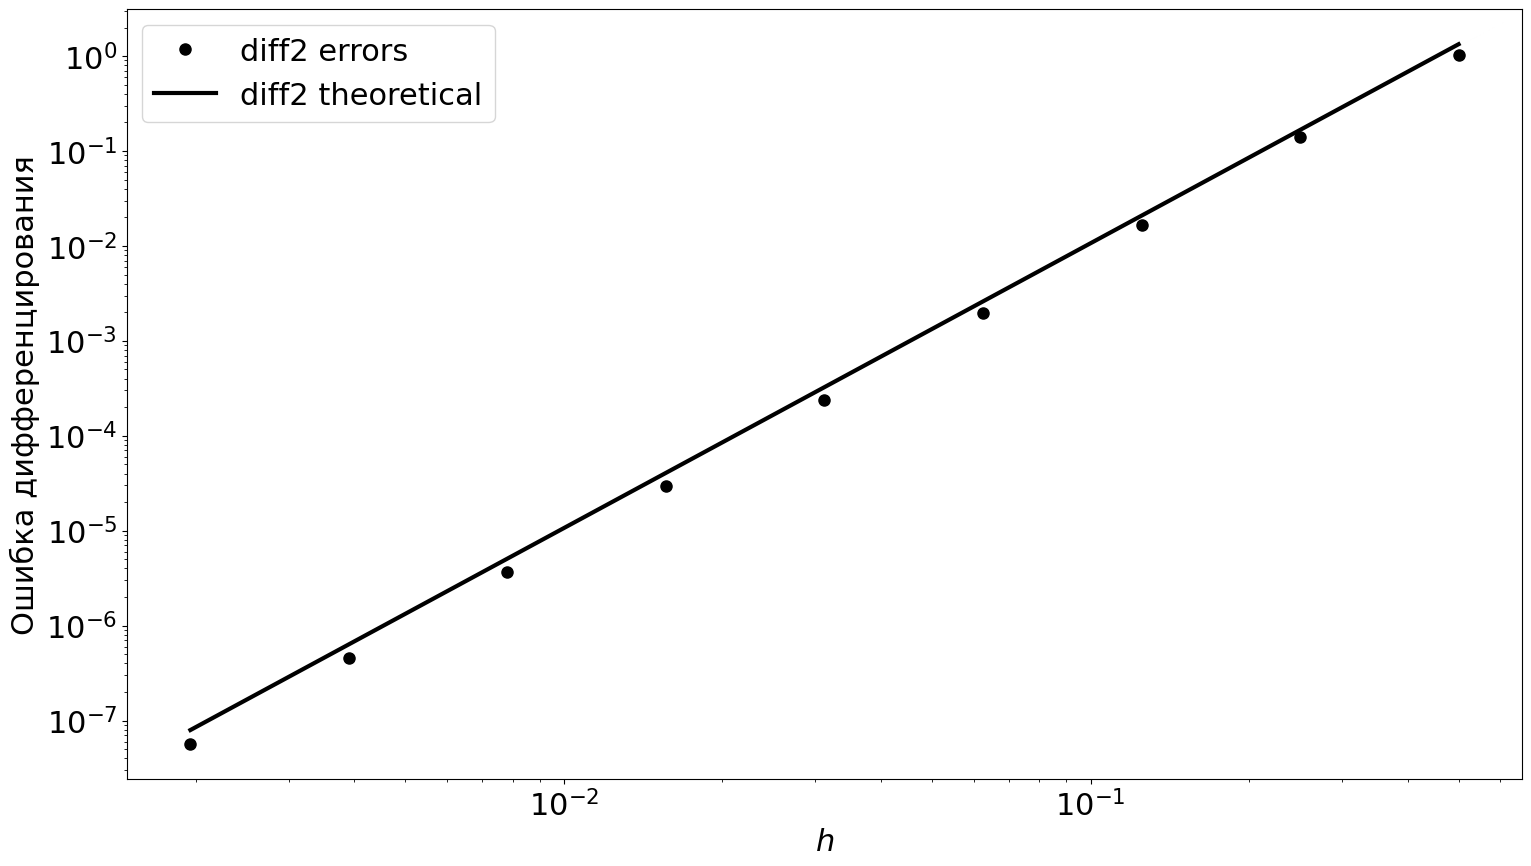

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc('font', **{'size' : 22})

# массив, содержащий различные шаги дифференцирования 2^(-1), 2^(-2), ...
h_array = 2.0**(-np.arange(1, 10, 1))

errors_diff2 = []
errors_diff2_theoretical = []

M4 = 16
x_0 = np.pi/8

def D_stencil(f, x0, h):
    a = 11/(60*h); b = 2/(3*h); c = -5/(4*h); d = 2/(5*h)
    return (a*f(x0+2*h) + b*f(x0-h) + c*f(x0-2*h) + d*f(x0-3*h))

cos2x = lambda x: np.cos(2*x)
d_cos2x = lambda x: -2*np.sin(2*x)

for h in h_array:
    approx = D_stencil(cos2x, x_0, h)
    exact  = d_cos2x(x_0)
    errors_diff2.append(abs(approx - exact))
    errors_diff2_theoretical.append((2/3)*M4*h**3)

plt.figure(figsize=(18, 10))

plt.loglog(h_array, errors_diff2, 'k.', ms=16, label='diff2 errors')
plt.loglog(h_array,errors_diff2_theoretical, 'k-', label='diff2 theoretical', lw=3)

plt.xlabel('$h$')
plt.ylabel('Ошибка дифференцирования')
plt.legend()

plt.show()

$f(x) = \cos^2(x)$

$f'(x) = 2\cos(x)\sin(x) = sin(2x)$

$x_0 = \frac{\pi}{8}$

In [25]:
def diff1(f, x0, h):
    return (f(x0 + h) - f(x0)) / h

def diff2(f, x0, h):
    return (f(x0 + h) - f(x0 - h)) / (2 * h)

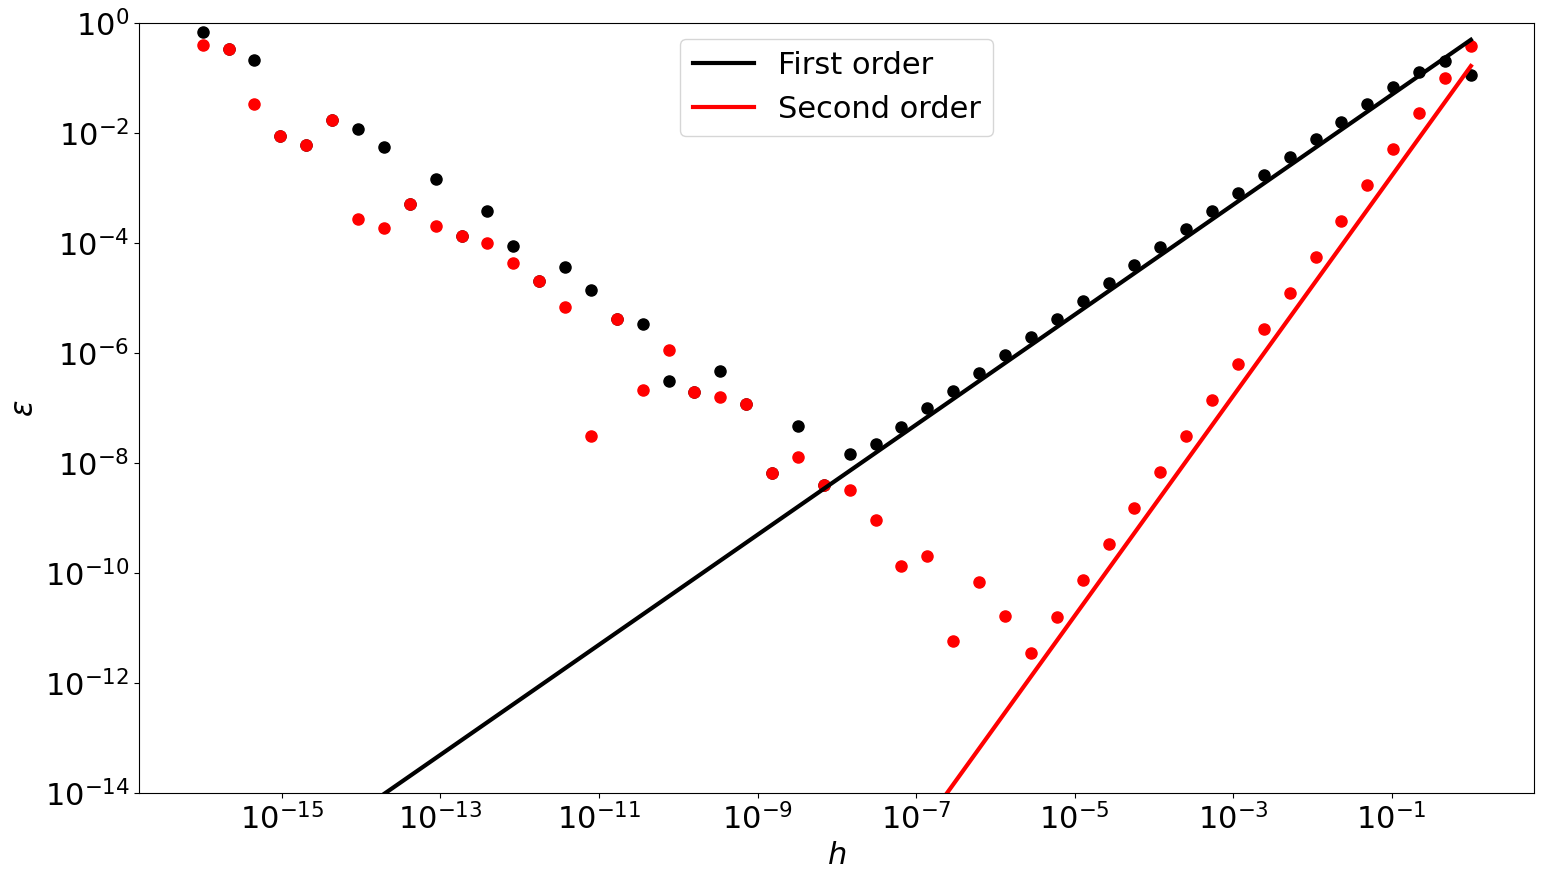

In [32]:
hs = np.logspace(-16, 0, num=50) # h = 1e-16 ... 1
errs1 = []
errs2 = []
x_0 = np.pi/8

f = lambda x: np.cos(x)**2
fp = lambda x: -np.sin(2*x)

for h in hs:
    errs1.append(abs(diff1(f, x_0, h) - fp(x_0)))
    errs2.append(abs(diff2(f, x_0, h) - fp(x_0)))


M2 = M3 = 1
plt.figure(figsize=(18, 10))
plt.loglog(hs, errs1, 'k.', ms=16)
plt.loglog(hs, errs2, 'r.', ms=16)
plt.loglog(hs, M2 * hs / 2, 'k-', label='First order', lw=3)
plt.loglog(hs, M3 * hs**2 / 6, 'r-', label='Second order', lw=3)
plt.ylim(1e-14, 1)
plt.xlabel('$h$')
plt.ylabel('$\\varepsilon$')
plt.legend(loc='upper center')
plt.show()